<b><h1>Lahore Housing Prices Analysis</h1></b>

![Alt text](https://wallpapers.com/images/high/people-gathering-in-lahore-igg5x2lhegjghqd1.webp)

In [95]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<b><h2>Data Description</h2></b>
Price of Houses in Lahore Dataset is a comprehensive collection of houses available for sale in Lahore. Information is extracted from the popular real estate website, https://www.zameen.com/. This dataset comprises more than 17000 data points, each representing a unique house listing, and includes six distinct features.

<b><h2>Column Description</h2></b>
- house_id: unique id of house
- Type: House or Flat
- Location: Location of house within Lahore
- Area: Area of House
- Bath(s): No of bathrooms in house
- Bedroom(s): No of bedrooms in house
- Price: price of the house in Pakistani rupee (PKR)

<b><h2>Data Wrangling</h2></b>

In [96]:
# loading the dataset
df =pd.read_csv("lahore_housing_prices.csv")
df

,house_id,Type,Location,Area,Bath(s),Bedroom(s),Price
0,46326643,House,"DHA Defence, Lahore, Punjab",1 Kanal,6,5,75500000
1,46952582,House,"Bahria Orchard, Lahore, Punjab",8 Marla,5,5,25000000
2,47357581,House,"Paragon City, Lahore, Punjab",10 Marla,6,5,47000000
3,47397157,Flat,"Askari, Lahore, Punjab",10 Marla,3,3,28000000
4,43109993,House,"DHA Defence, Lahore, Punjab",8 Marla,5,4,43500000
...,...,...,...,...,...,...,...
17164,46266486,House,"PIA Housing Scheme, Lahore, Punjab",1 Kanal,6,7,49000000
17165,45309378,House,"DHA Defence, Lahore, Punjab",5 Marla,4,3,28000000
17166,38889542,House,"DHA Defence, Lahore, Punjab",1 Kanal,7,6,108500000
17167,38081209,House,"DHA Defence, Lahore, Punjab",1 Kanal,6,5,75500000


<b><h3>Data Assessing</h3><b>

In [97]:
# making copy of data
house =df.copy()
house

,house_id,Type,Location,Area,Bath(s),Bedroom(s),Price
0,46326643,House,"DHA Defence, Lahore, Punjab",1 Kanal,6,5,75500000
1,46952582,House,"Bahria Orchard, Lahore, Punjab",8 Marla,5,5,25000000
2,47357581,House,"Paragon City, Lahore, Punjab",10 Marla,6,5,47000000
3,47397157,Flat,"Askari, Lahore, Punjab",10 Marla,3,3,28000000
4,43109993,House,"DHA Defence, Lahore, Punjab",8 Marla,5,4,43500000
...,...,...,...,...,...,...,...
17164,46266486,House,"PIA Housing Scheme, Lahore, Punjab",1 Kanal,6,7,49000000
17165,45309378,House,"DHA Defence, Lahore, Punjab",5 Marla,4,3,28000000
17166,38889542,House,"DHA Defence, Lahore, Punjab",1 Kanal,7,6,108500000
17167,38081209,House,"DHA Defence, Lahore, Punjab",1 Kanal,6,5,75500000


In [98]:
# first 5 records
house.head(5)

,house_id,Type,Location,Area,Bath(s),Bedroom(s),Price
0,46326643,House,"DHA Defence, Lahore, Punjab",1 Kanal,6,5,75500000
1,46952582,House,"Bahria Orchard, Lahore, Punjab",8 Marla,5,5,25000000
2,47357581,House,"Paragon City, Lahore, Punjab",10 Marla,6,5,47000000
3,47397157,Flat,"Askari, Lahore, Punjab",10 Marla,3,3,28000000
4,43109993,House,"DHA Defence, Lahore, Punjab",8 Marla,5,4,43500000


In [99]:
# last 5 rows
house.tail(5)

,house_id,Type,Location,Area,Bath(s),Bedroom(s),Price
17164,46266486,House,"PIA Housing Scheme, Lahore, Punjab",1 Kanal,6,7,49000000
17165,45309378,House,"DHA Defence, Lahore, Punjab",5 Marla,4,3,28000000
17166,38889542,House,"DHA Defence, Lahore, Punjab",1 Kanal,7,6,108500000
17167,38081209,House,"DHA Defence, Lahore, Punjab",1 Kanal,6,5,75500000
17168,46962294,House,"DHA Defence, Lahore, Punjab",10 Marla,5,4,55000000


In [100]:
# total rows and cols
house.shape

(17169, 7)

In [101]:
# data type and not null values in each col
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17169 entries, 0 to 17168
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   house_id    17169 non-null  int64 
 1   Type        17169 non-null  object
 2   Location    17169 non-null  object
 3   Area        17169 non-null  object
 4   Bath(s)     17169 non-null  int64 
 5   Bedroom(s)  17169 non-null  int64 
 6   Price       17169 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 939.1+ KB


In [102]:
# checking duplicates
house.duplicated().sum()

0

<b><h4>Observation</h4></b>
1. Messy Data Issues:
   - Area Column should be spit into two columns Amount and unit
   - In Location we dont need City and Country as we know we already working on Lahore dataset

<b><h3>Data Cleaning</h3><b>

In [103]:
house

,house_id,Type,Location,Area,Bath(s),Bedroom(s),Price
0,46326643,House,"DHA Defence, Lahore, Punjab",1 Kanal,6,5,75500000
1,46952582,House,"Bahria Orchard, Lahore, Punjab",8 Marla,5,5,25000000
2,47357581,House,"Paragon City, Lahore, Punjab",10 Marla,6,5,47000000
3,47397157,Flat,"Askari, Lahore, Punjab",10 Marla,3,3,28000000
4,43109993,House,"DHA Defence, Lahore, Punjab",8 Marla,5,4,43500000
...,...,...,...,...,...,...,...
17164,46266486,House,"PIA Housing Scheme, Lahore, Punjab",1 Kanal,6,7,49000000
17165,45309378,House,"DHA Defence, Lahore, Punjab",5 Marla,4,3,28000000
17166,38889542,House,"DHA Defence, Lahore, Punjab",1 Kanal,7,6,108500000
17167,38081209,House,"DHA Defence, Lahore, Punjab",1 Kanal,6,5,75500000


In [104]:
# splitting area into cols
house["Land Amount"] =house["Area"].apply(lambda x: x.split(" ")[0])
house["Unit"] =house["Area"].apply(lambda x: x.split(" ")[1])
house

,house_id,Type,Location,Area,Bath(s),Bedroom(s),Price,Land Amount,Unit
0,46326643,House,"DHA Defence, Lahore, Punjab",1 Kanal,6,5,75500000,1,Kanal
1,46952582,House,"Bahria Orchard, Lahore, Punjab",8 Marla,5,5,25000000,8,Marla
2,47357581,House,"Paragon City, Lahore, Punjab",10 Marla,6,5,47000000,10,Marla
3,47397157,Flat,"Askari, Lahore, Punjab",10 Marla,3,3,28000000,10,Marla
4,43109993,House,"DHA Defence, Lahore, Punjab",8 Marla,5,4,43500000,8,Marla
...,...,...,...,...,...,...,...,...,...
17164,46266486,House,"PIA Housing Scheme, Lahore, Punjab",1 Kanal,6,7,49000000,1,Kanal
17165,45309378,House,"DHA Defence, Lahore, Punjab",5 Marla,4,3,28000000,5,Marla
17166,38889542,House,"DHA Defence, Lahore, Punjab",1 Kanal,7,6,108500000,1,Kanal
17167,38081209,House,"DHA Defence, Lahore, Punjab",1 Kanal,6,5,75500000,1,Kanal


In [105]:
# dropping area column
house.drop(columns=["Area"], inplace=True)

In [106]:
house

,house_id,Type,Location,Bath(s),Bedroom(s),Price,Land Amount,Unit
0,46326643,House,"DHA Defence, Lahore, Punjab",6,5,75500000,1,Kanal
1,46952582,House,"Bahria Orchard, Lahore, Punjab",5,5,25000000,8,Marla
2,47357581,House,"Paragon City, Lahore, Punjab",6,5,47000000,10,Marla
3,47397157,Flat,"Askari, Lahore, Punjab",3,3,28000000,10,Marla
4,43109993,House,"DHA Defence, Lahore, Punjab",5,4,43500000,8,Marla
...,...,...,...,...,...,...,...,...
17164,46266486,House,"PIA Housing Scheme, Lahore, Punjab",6,7,49000000,1,Kanal
17165,45309378,House,"DHA Defence, Lahore, Punjab",4,3,28000000,5,Marla
17166,38889542,House,"DHA Defence, Lahore, Punjab",7,6,108500000,1,Kanal
17167,38081209,House,"DHA Defence, Lahore, Punjab",6,5,75500000,1,Kanal


In [107]:
# removing city, country from Location
house["Location"] =house["Location"].apply(lambda x: x.split(", ")[0])
house

,house_id,Type,Location,Bath(s),Bedroom(s),Price,Land Amount,Unit
0,46326643,House,DHA Defence,6,5,75500000,1,Kanal
1,46952582,House,Bahria Orchard,5,5,25000000,8,Marla
2,47357581,House,Paragon City,6,5,47000000,10,Marla
3,47397157,Flat,Askari,3,3,28000000,10,Marla
4,43109993,House,DHA Defence,5,4,43500000,8,Marla
...,...,...,...,...,...,...,...,...
17164,46266486,House,PIA Housing Scheme,6,7,49000000,1,Kanal
17165,45309378,House,DHA Defence,4,3,28000000,5,Marla
17166,38889542,House,DHA Defence,7,6,108500000,1,Kanal
17167,38081209,House,DHA Defence,6,5,75500000,1,Kanal


In [108]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17169 entries, 0 to 17168
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   house_id     17169 non-null  int64 
 1   Type         17169 non-null  object
 2   Location     17169 non-null  object
 3   Bath(s)      17169 non-null  int64 
 4   Bedroom(s)   17169 non-null  int64 
 5   Price        17169 non-null  int64 
 6   Land Amount  17169 non-null  object
 7   Unit         17169 non-null  object
dtypes: int64(4), object(4)
memory usage: 1.0+ MB


In [109]:
# type casting land amount
house["Land Amount"] =house["Land Amount"].astype("float64")

<b><h2>Exploratory Data Analysis</h2></b>

1. <b><h3>Univarite Analysis</h3><b>

1. <b><h4>House Type</h4><b>

In [110]:
# count of each type of house
house["Type"].value_counts()

Type
House        16017
Flat          1146
Penthouse        4
Room             2
Name: count, dtype: int64

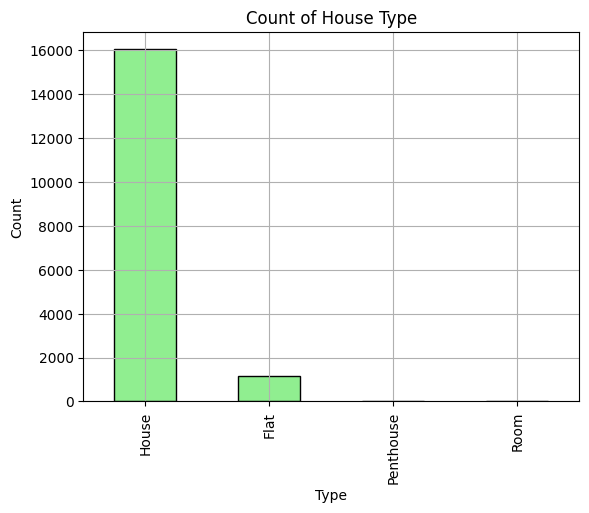

In [111]:
# bar chart of house type
house["Type"].value_counts().plot(kind="bar", color ="lightgreen", edgecolor="black", title="Count of House Type", xlabel="Type", ylabel="Count")
plt.grid()

2. <b><h4>Location</h4><b>

In [112]:
house["Location"].value_counts()

Location
DHA Defence            4845
Bahria Town            1767
Askari                  852
Raiwind Road            599
Johar Town              511
                       ... 
UBL Housing Society       1
Aashiana Road             1
Aitchison Society         1
Wahdat Colony             1
Rehman Park               1
Name: count, Length: 324, dtype: int64

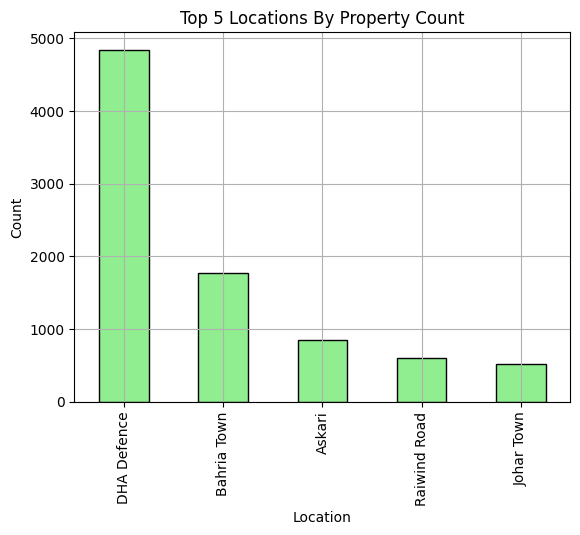

In [113]:
# Top 5 Locations in terms of count
house["Location"].value_counts()[0:5].plot(kind ="bar", color="lightgreen", edgecolor="black", title="Top 5 Locations By Property Count",xlabel="Location", ylabel="Count" )
plt.grid()

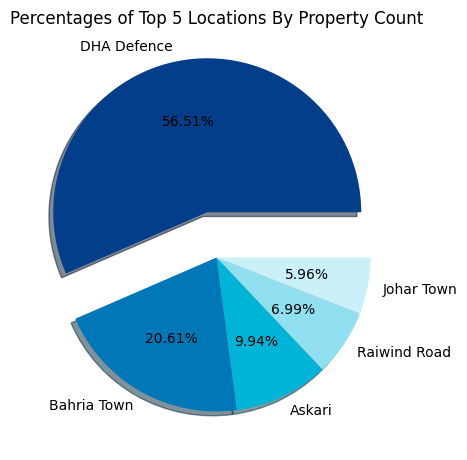

In [150]:
plt.figure(figsize=(5,5))
house["Location"].value_counts()[0:5].plot(kind ="pie", explode =[0.3,0,0,0,0], shadow =True, autopct ="%.2f%%", colors =["#023E8A", "#0077B6", "#00B4D8", "#90E0EF", "#CAF0F8"])
plt.title("Percentages of Top 5 Locations By Property Count", pad=30)
plt.ylabel("")

plt.show()

3. <b><h4>No. of Baths</h4></b> 

In [115]:
house

,house_id,Type,Location,Bath(s),Bedroom(s),Price,Land Amount,Unit
0,46326643,House,DHA Defence,6,5,75500000,1.0,Kanal
1,46952582,House,Bahria Orchard,5,5,25000000,8.0,Marla
2,47357581,House,Paragon City,6,5,47000000,10.0,Marla
3,47397157,Flat,Askari,3,3,28000000,10.0,Marla
4,43109993,House,DHA Defence,5,4,43500000,8.0,Marla
...,...,...,...,...,...,...,...,...
17164,46266486,House,PIA Housing Scheme,6,7,49000000,1.0,Kanal
17165,45309378,House,DHA Defence,4,3,28000000,5.0,Marla
17166,38889542,House,DHA Defence,7,6,108500000,1.0,Kanal
17167,38081209,House,DHA Defence,6,5,75500000,1.0,Kanal


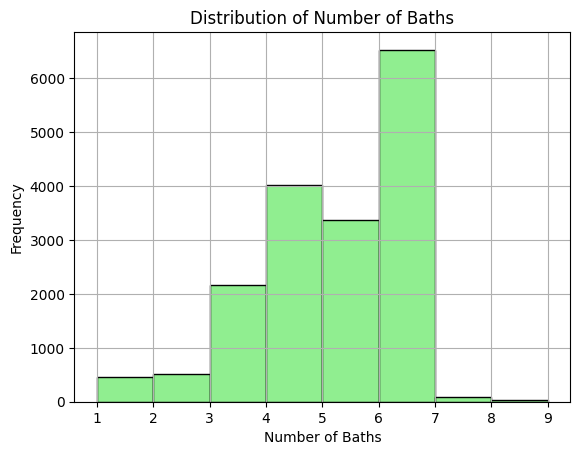

In [116]:
# distribution of number of baths
house["Bath(s)"].plot(kind="hist", bins =[1,2,3,4,5,6,7,8 ,9], title="Distribution of Number of Baths", color="lightgreen", xlabel="Number of Baths", edgecolor="black") 
plt.grid()

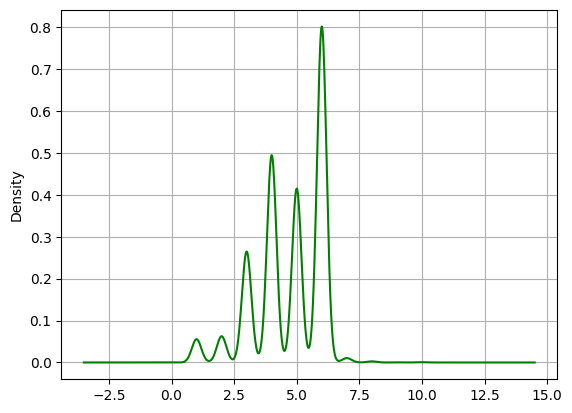

In [117]:
# distribution of number of baths
house["Bath(s)"].plot(kind="kde", color ="green")
plt.grid()

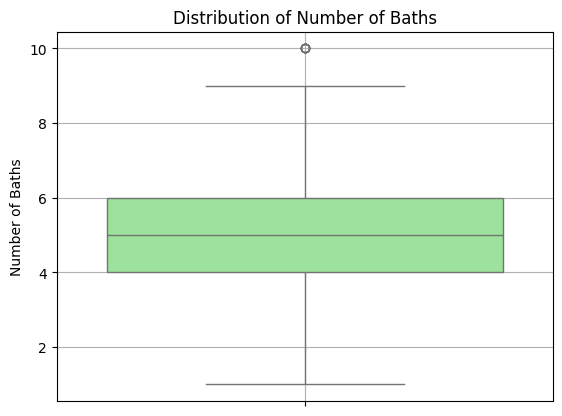

In [147]:
sns.boxplot(house["Bath(s)"], color="lightgreen")
plt.title("Distribution of Number of Baths")
plt.ylabel("Number of Baths")
plt.grid()

In [119]:
# chekcing skewness in data
house["Bath(s)"].skew()

-0.7184439433016542

4. <b><h4>No. of Bedrooms</h4></b> 

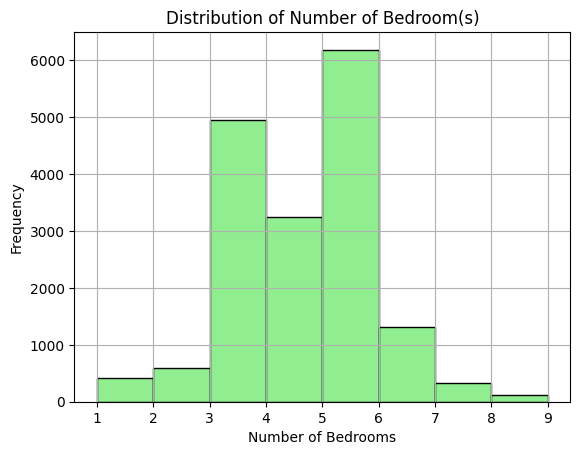

In [120]:
# distribution of number of bedrooms
house["Bedroom(s)"].plot(kind="hist", bins =[1,2,3,4,5,6,7,8 ,9], title="Distribution of Number of Bedroom(s)", color="lightgreen", xlabel="Number of Bedrooms", edgecolor="black") 
plt.grid()

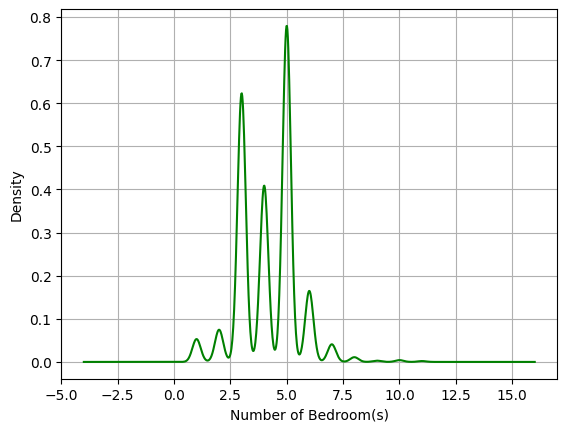

In [121]:
# distribution of number of edrooms
house["Bedroom(s)"].plot(kind="kde", color ="green")
plt.xlabel("Number of Bedroom(s)")
plt.grid()

Text(0, 0.5, 'Number of Bedroom(s)')

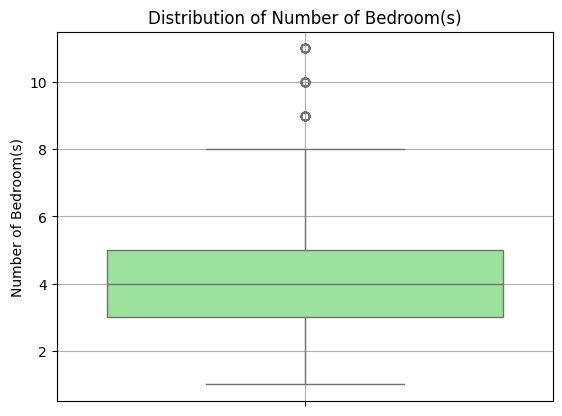

In [146]:
sns.boxplot(house["Bedroom(s)"], color="lightgreen")
plt.title("Distribution of Number of Bedroom(s)")
plt.grid()
plt.ylabel("Number of Bedroom(s)")

In [123]:
house["Bedroom(s)"].skew()

0.2537100157482508

5. <b><h4>Price</h4></b>

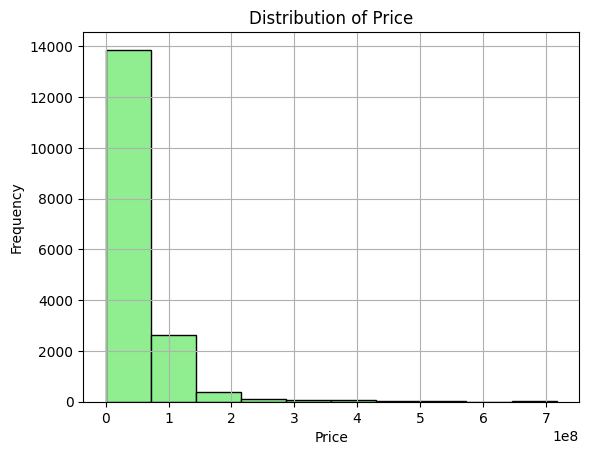

In [124]:
# Distribution of Price
house["Price"].plot(kind="hist", title="Distribution of Price", color="lightgreen", xlabel="Price", edgecolor="black") 
plt.grid()

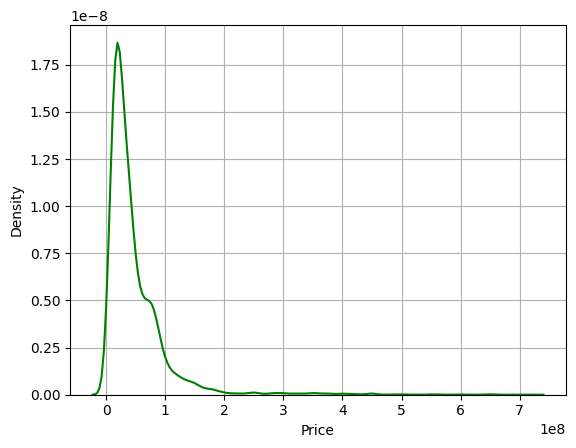

In [156]:
sns.kdeplot(house["Price"], color="green")
plt.xlabel("Price")
plt.grid()

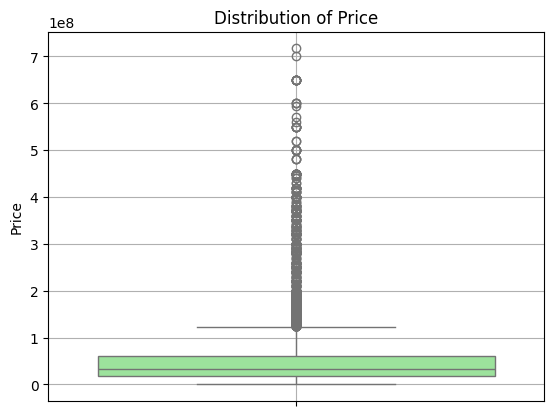

In [151]:
sns.boxplot(house["Price"], color="lightgreen")
plt.title("Distribution of Price")
plt.grid()

In [127]:
# checking skewness in Data
house["Price"].skew()

4.4474993133816625

6. <b><h4>Land Amount</h4><b>

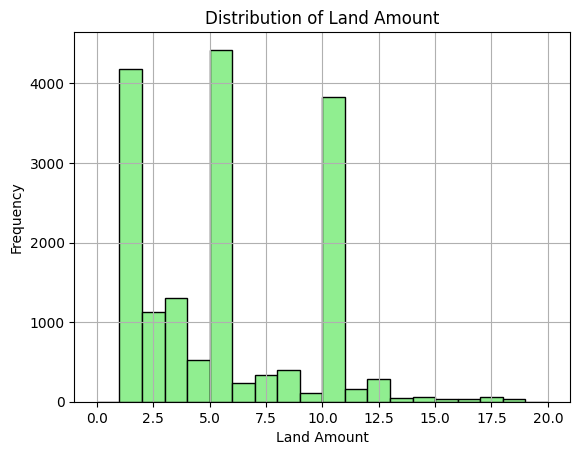

In [152]:
# Distribution of land amount
house["Land Amount"].plot(kind="hist", bins=np.arange(0, 21, 1), title="Distribution of Land Amount", xlabel ="Land Amount", color="lightgreen", edgecolor ="black")
plt.grid()

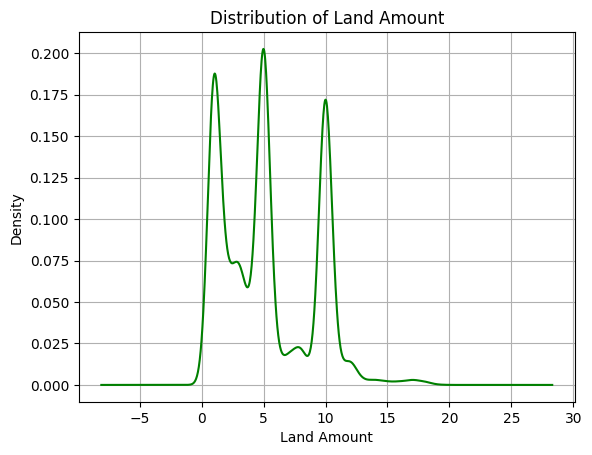

In [155]:
house["Land Amount"].plot(kind="kde", title="Distribution of Land Amount", color="green")
plt.xlabel("Land Amount")
plt.grid()

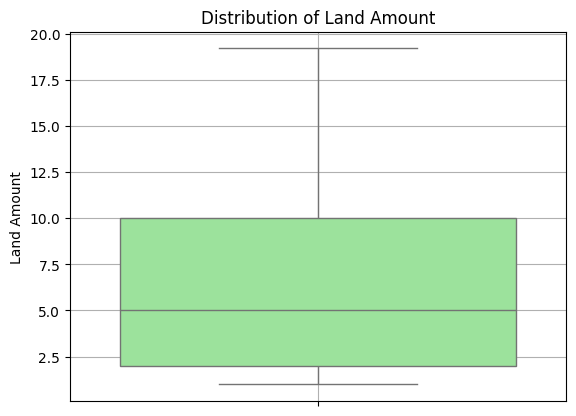

In [154]:
sns.boxplot(house["Land Amount"], color="lightgreen")
plt.title("Distribution of Land Amount")
plt.grid()

In [144]:
# checking skewness in data
house["Land Amount"].skew()

0.5570188587042832

7. <b><h4>Unit</h4></b>

In [157]:
house["Unit"].value_counts()

Unit
Marla    12445
Kanal     4724
Name: count, dtype: int64

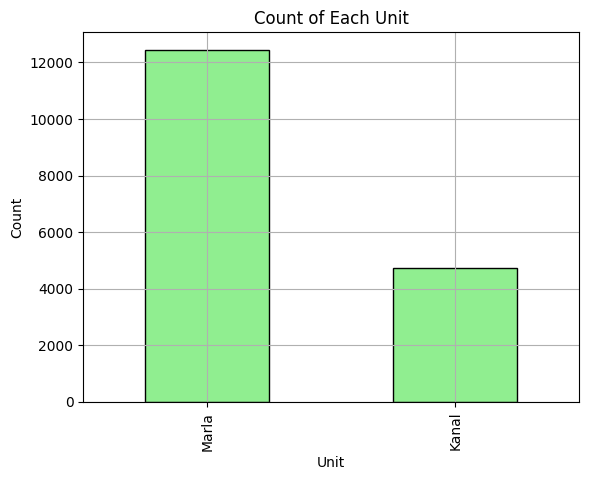

In [165]:
# count of each unit
house["Unit"].value_counts().plot(kind="bar", color="lightgreen", edgecolor="black", title="Count of Each Unit", xlabel ="Unit", ylabel ="Count")
plt.grid()

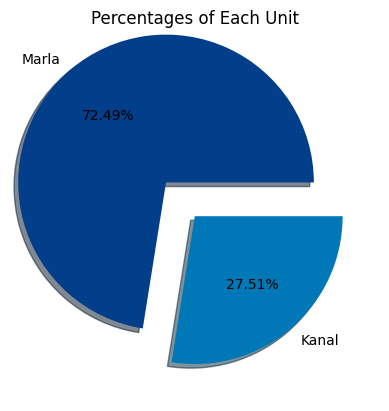

In [164]:
house["Unit"].value_counts().plot(kind="pie", colors =["#023E8A", "#0077B6"], shadow=True, autopct ="%.2f%%", explode =[0.3, 0])
plt.title("Percentages of Each Unit")
plt.ylabel("")
plt.show()

<b><h3>Grouped Analysis</h3><b>

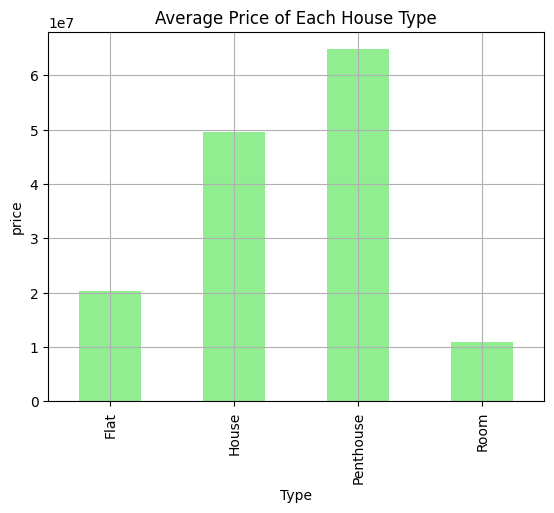

In [171]:
# average price of each house type
house.groupby("Type")["Price"].mean().plot(kind ="bar", title="Average Price of Each House Type", xlabel ="Type", ylabel ="price", color="lightgreen")
plt.grid()

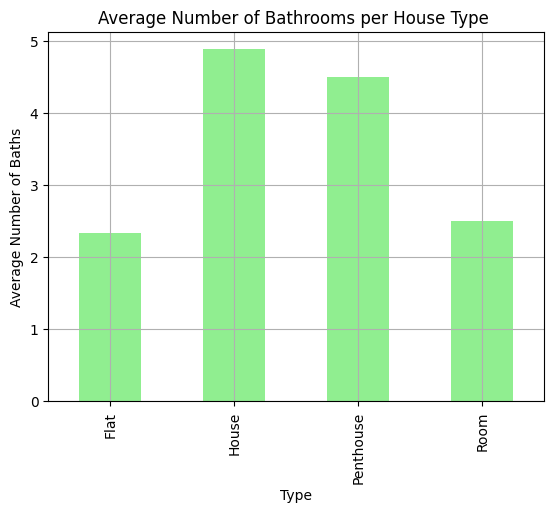

In [175]:
house.groupby("Type")["Bath(s)"].mean().plot(kind ="bar", title="Average Number of Bathrooms per House Type ", xlabel ="Type", ylabel ="Average Number of Baths", color="lightgreen")
plt.grid()

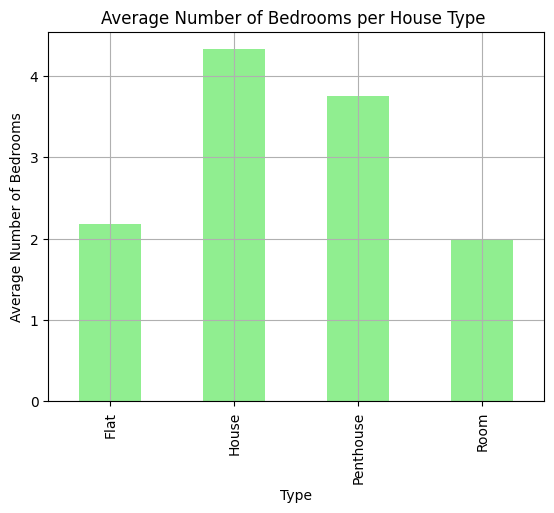

In [177]:
house.groupby("Type")["Bedroom(s)"].mean().plot(kind ="bar", title="Average Number of Bedrooms per House Type ", xlabel ="Type", ylabel ="Average Number of Bedrooms", color="lightgreen")
plt.grid()

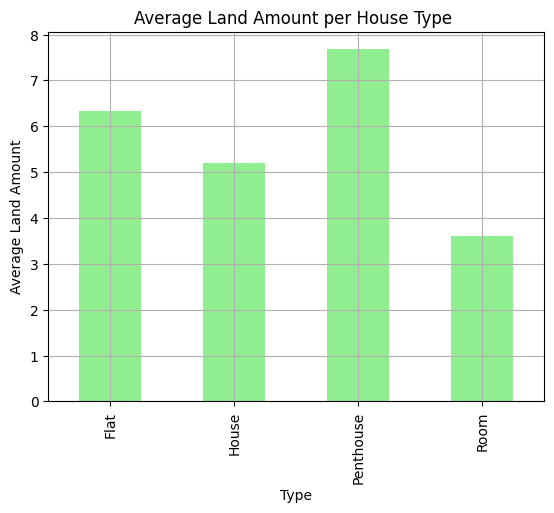

In [181]:
house.groupby("Type")["Land Amount"].mean().plot(kind ="bar", title="Average Land Amount per House Type ", xlabel ="Type", ylabel ="Average Land Amount", color="lightgreen")
plt.grid()

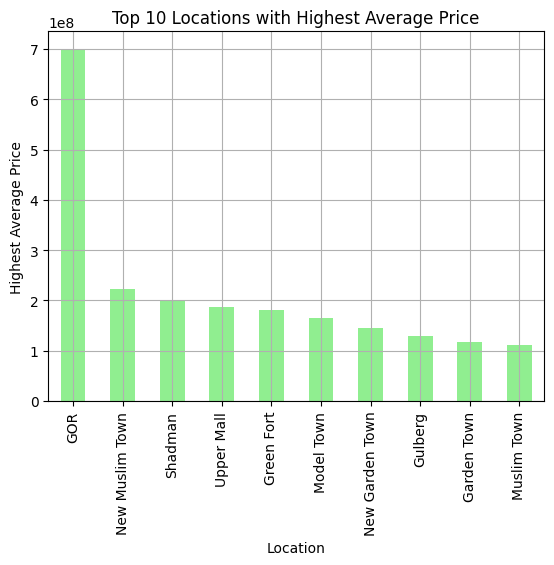

In [190]:
house.groupby("Location")["Price"].mean().sort_values(ascending =False)[0:10].plot(kind="bar", color ="lightgreen", title="Top 10 Locations with Highest Average Price", xlabel ="Location", ylabel="Highest Average Price")
plt.grid()

In [191]:
house

,house_id,Type,Location,Bath(s),Bedroom(s),Price,Land Amount,Unit
0,46326643,House,DHA Defence,6,5,75500000,1.0,Kanal
1,46952582,House,Bahria Orchard,5,5,25000000,8.0,Marla
2,47357581,House,Paragon City,6,5,47000000,10.0,Marla
3,47397157,Flat,Askari,3,3,28000000,10.0,Marla
4,43109993,House,DHA Defence,5,4,43500000,8.0,Marla
...,...,...,...,...,...,...,...,...
17164,46266486,House,PIA Housing Scheme,6,7,49000000,1.0,Kanal
17165,45309378,House,DHA Defence,4,3,28000000,5.0,Marla
17166,38889542,House,DHA Defence,7,6,108500000,1.0,Kanal
17167,38081209,House,DHA Defence,6,5,75500000,1.0,Kanal


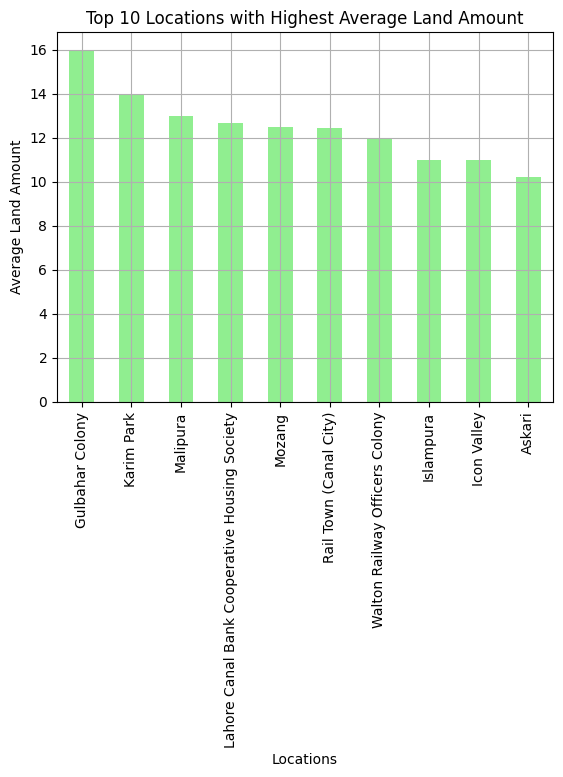

In [194]:
house.groupby("Location")["Land Amount"].mean().sort_values(ascending =False)[0:10].plot(kind ="bar", title="Top 10 Locations with Highest Average Land Amount", xlabel ="Locations", ylabel ="Average Land Amount", color="lightgreen")
plt.grid()

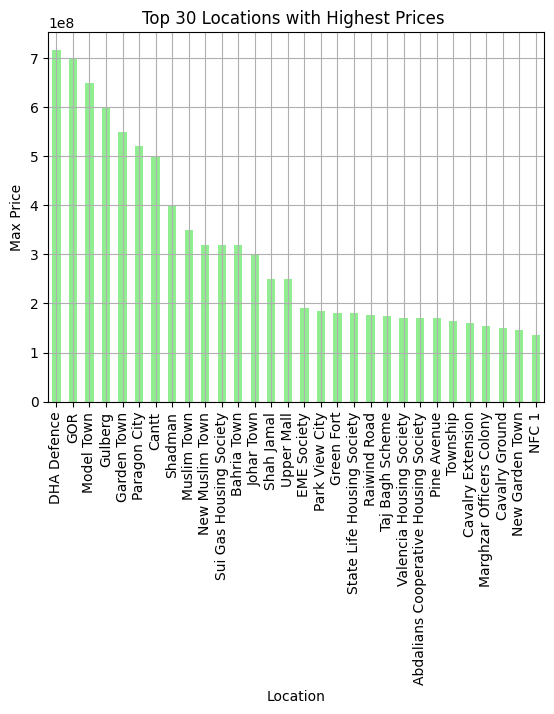

In [198]:
house.groupby("Location")["Price"].max().sort_values(ascending =False)[0:30].plot(kind ="bar", title="Top 30 Locations with Highest Prices ", xlabel ="Location", ylabel ="Max Price", color="lightgreen")
plt.grid()

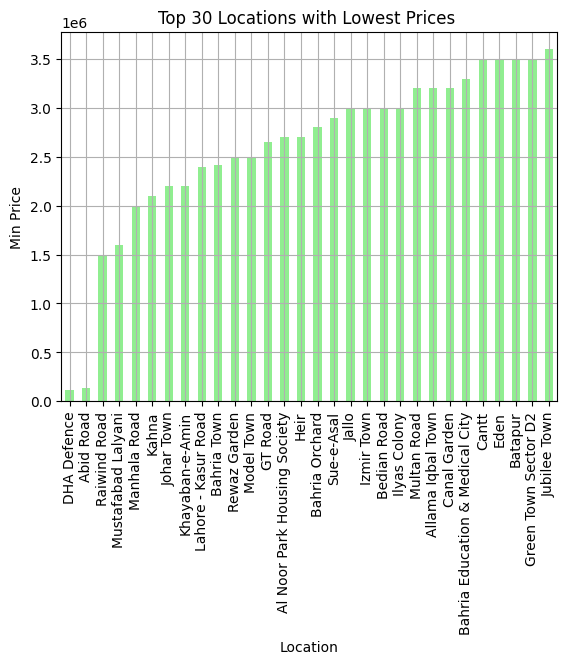

In [201]:
house.groupby("Location")["Price"].min().sort_values(ascending =True)[0:30].plot(kind ="bar", title="Top 30 Locations with Lowest Prices ", xlabel ="Location", ylabel ="Min Price", color="lightgreen")
plt.grid()

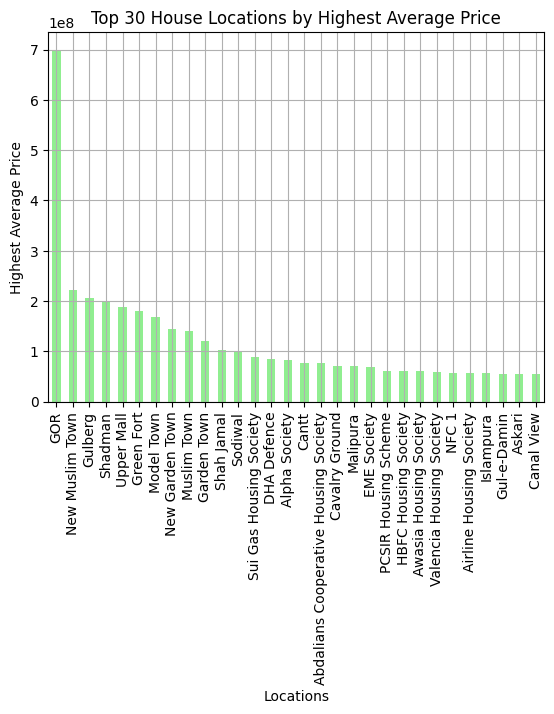

In [228]:
house[house["Type"]=="House"].groupby("Location")["Price"].mean().sort_values(ascending =False)[0:30].plot(kind="bar", color="lightgreen", title="Top 30 House Locations by Highest Average Price", xlabel="Locations", ylabel="Highest Average Price")
plt.grid()


<b><h3>Bivariate Analysis</h3><b>

In [229]:
house

,house_id,Type,Location,Bath(s),Bedroom(s),Price,Land Amount,Unit
0,46326643,House,DHA Defence,6,5,75500000,1.0,Kanal
1,46952582,House,Bahria Orchard,5,5,25000000,8.0,Marla
2,47357581,House,Paragon City,6,5,47000000,10.0,Marla
3,47397157,Flat,Askari,3,3,28000000,10.0,Marla
4,43109993,House,DHA Defence,5,4,43500000,8.0,Marla
...,...,...,...,...,...,...,...,...
17164,46266486,House,PIA Housing Scheme,6,7,49000000,1.0,Kanal
17165,45309378,House,DHA Defence,4,3,28000000,5.0,Marla
17166,38889542,House,DHA Defence,7,6,108500000,1.0,Kanal
17167,38081209,House,DHA Defence,6,5,75500000,1.0,Kanal


Text(0.5, 1.0, 'Count Between Type and Unit of Property')

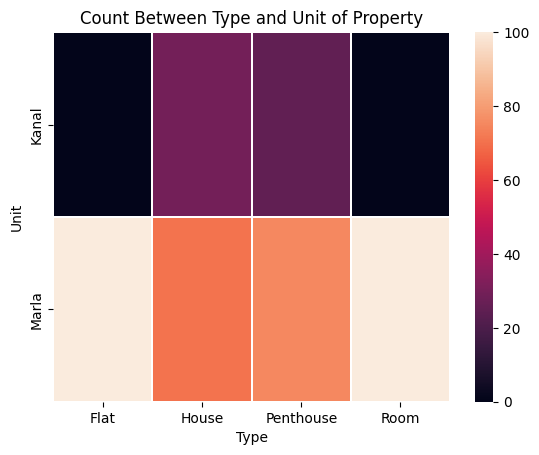

In [247]:

sns.heatmap(pd.crosstab(house["Unit"], house["Type"], normalize ="columns")*100, linewidth =0.2)
plt.title("Count Between Type and Unit of Property")


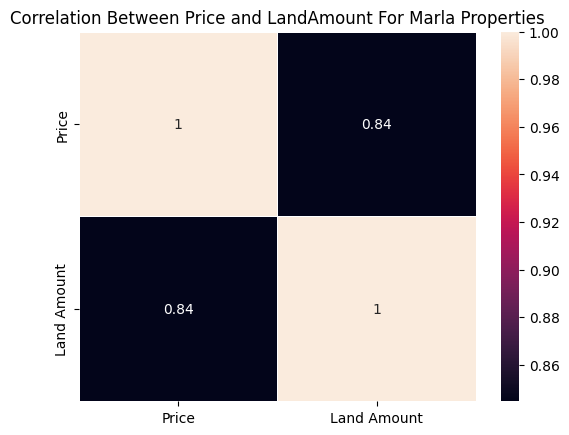

In [266]:
sns.heatmap(house[house["Unit"]=="Marla"][["Price", "Land Amount"]].corr(), annot =True, linewidth =0.5)
plt.title("Correlation Between Price and LandAmount For Marla Properties")
plt.show()


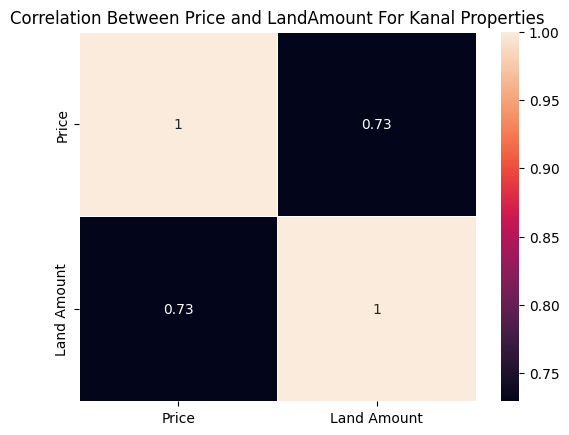

In [265]:
sns.heatmap(house[house["Unit"]=="Kanal"][["Price", "Land Amount"]].corr(), annot =True, linewidth =0.5)
plt.title("Correlation Between Price and LandAmount For Kanal Properties")
plt.show()


In [270]:
house

,house_id,Type,Location,Bath(s),Bedroom(s),Price,Land Amount,Unit
0,46326643,House,DHA Defence,6,5,75500000,1.0,Kanal
1,46952582,House,Bahria Orchard,5,5,25000000,8.0,Marla
2,47357581,House,Paragon City,6,5,47000000,10.0,Marla
3,47397157,Flat,Askari,3,3,28000000,10.0,Marla
4,43109993,House,DHA Defence,5,4,43500000,8.0,Marla
...,...,...,...,...,...,...,...,...
17164,46266486,House,PIA Housing Scheme,6,7,49000000,1.0,Kanal
17165,45309378,House,DHA Defence,4,3,28000000,5.0,Marla
17166,38889542,House,DHA Defence,7,6,108500000,1.0,Kanal
17167,38081209,House,DHA Defence,6,5,75500000,1.0,Kanal


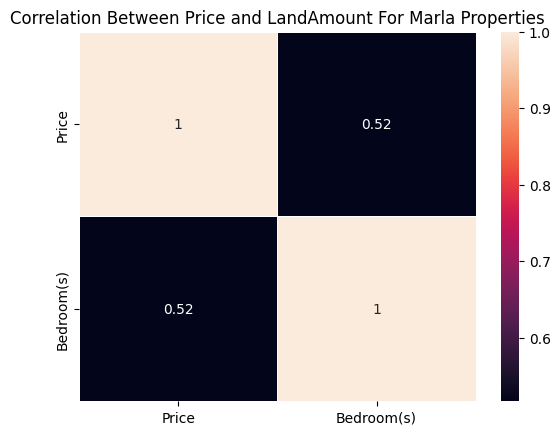

In [272]:
sns.heatmap(house[["Price", "Bedroom(s)"]].corr(), annot =True, linewidth =0.5)
plt.title("Correlation Between Price and Number of Bedrooms")
plt.show()

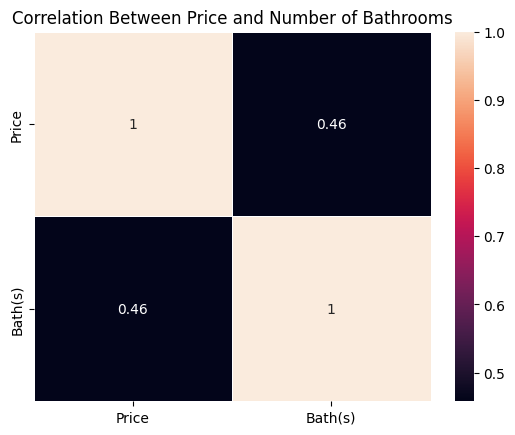

In [274]:
sns.heatmap(house[["Price", "Bath(s)"]].corr(), annot =True, linewidth =0.5)
plt.title("Correlation Between Price and Number of Bathrooms")
plt.show()

In [275]:
house

,house_id,Type,Location,Bath(s),Bedroom(s),Price,Land Amount,Unit
0,46326643,House,DHA Defence,6,5,75500000,1.0,Kanal
1,46952582,House,Bahria Orchard,5,5,25000000,8.0,Marla
2,47357581,House,Paragon City,6,5,47000000,10.0,Marla
3,47397157,Flat,Askari,3,3,28000000,10.0,Marla
4,43109993,House,DHA Defence,5,4,43500000,8.0,Marla
...,...,...,...,...,...,...,...,...
17164,46266486,House,PIA Housing Scheme,6,7,49000000,1.0,Kanal
17165,45309378,House,DHA Defence,4,3,28000000,5.0,Marla
17166,38889542,House,DHA Defence,7,6,108500000,1.0,Kanal
17167,38081209,House,DHA Defence,6,5,75500000,1.0,Kanal


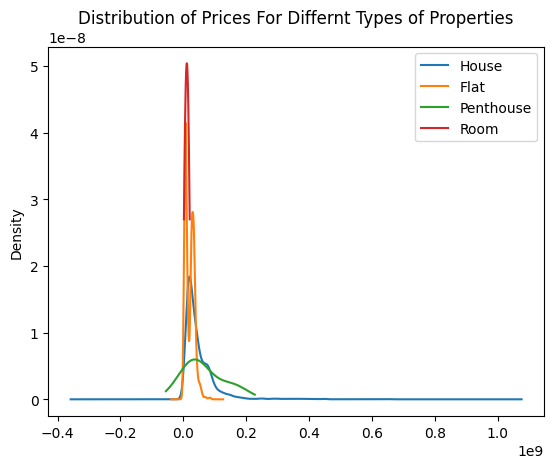

In [284]:

for i in house["Type"].unique():
    house[house["Type"]==i]["Price"].plot(kind="kde", label =i)
plt.title("Distribution of Prices For Differnt Types of Properties")
plt.legend()
plt.show()

<b><h3>Multivariate Analysis</h3></b>

Text(0.5, 1.0, 'Correlation Between Each Numerical Columns')

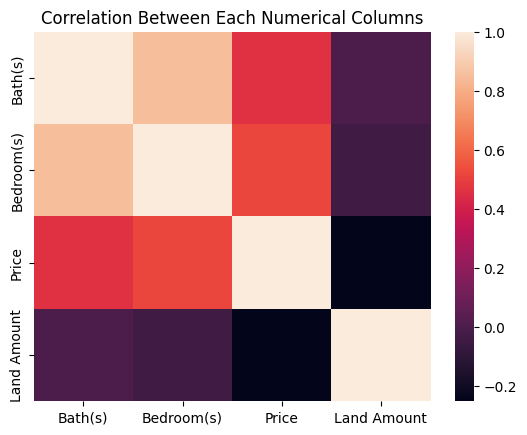

In [290]:
sns.heatmap(house[["Bath(s)", "Bedroom(s)", "Price", "Land Amount"]].corr())
plt.title("Correlation Between Each Numerical Columns")


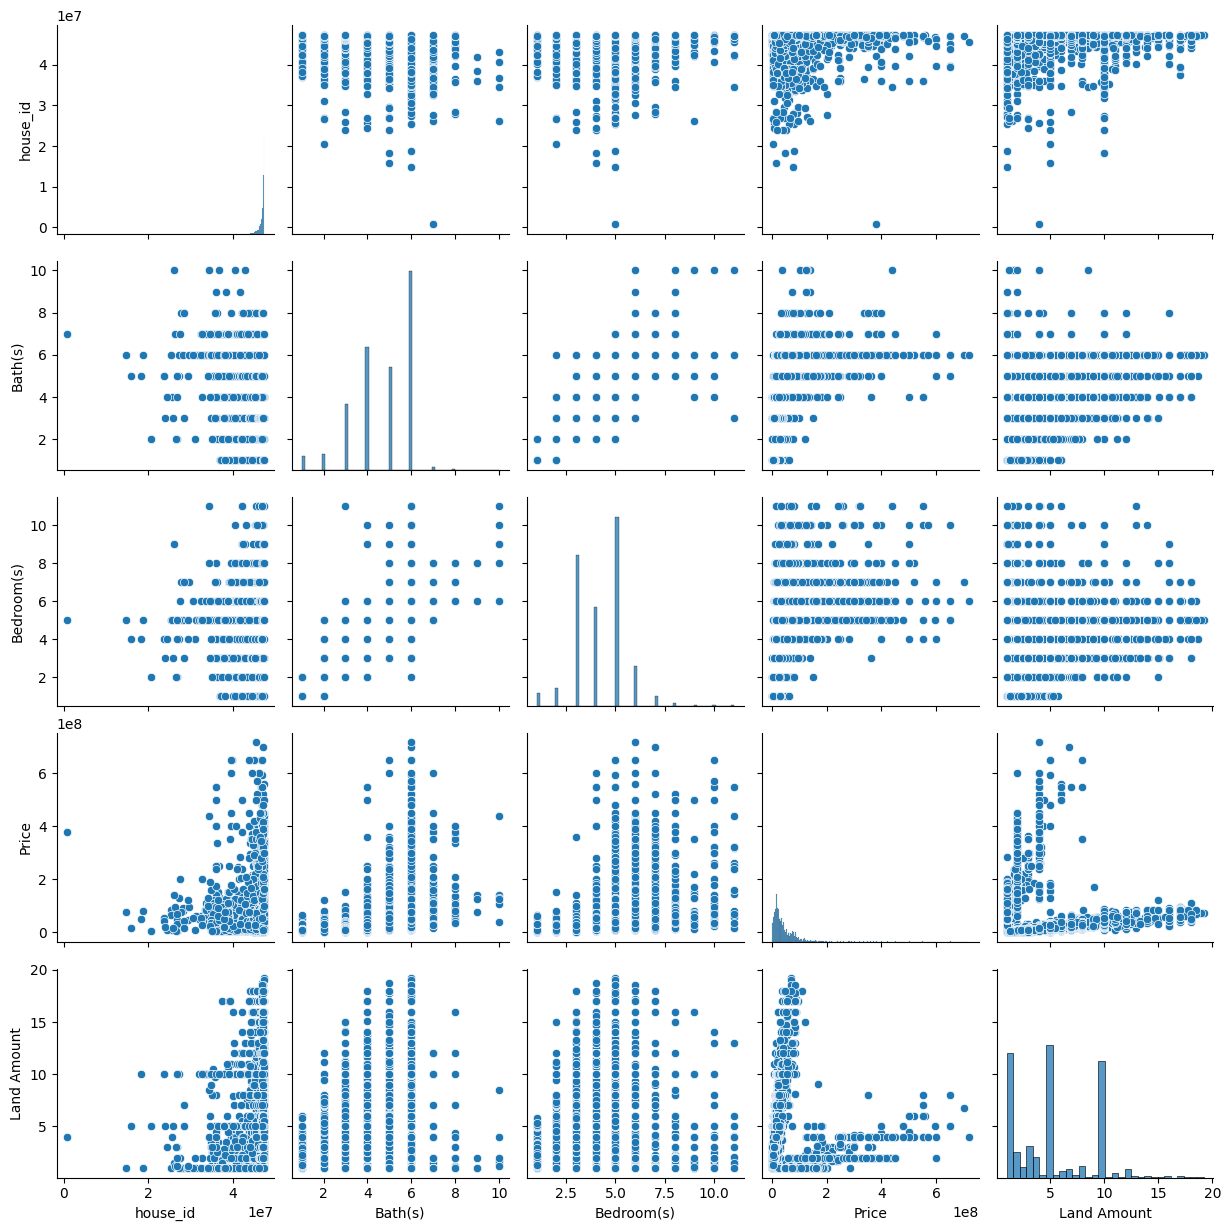

In [291]:
sns.pairplot(house)